In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/NeuralNetworks/nature_crop.zip", "r")
zip_ref.extractall("/content/nature")
zip_ref.close()

In [ ]:
batch_size=256
image_size=(100, 100)

In [ ]:
train_dataset = image_dataset_from_directory('nature/nature/seg_train/seg_train',
                                             subset='training',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 4222 files belonging to 4 classes.
Using 3800 files for training.


In [ ]:
validation_dataset = image_dataset_from_directory('nature/nature/seg_train/seg_train',
                                             subset='validation',
                                             seed=42,
                                             validation_split=0.1,
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 4222 files belonging to 4 classes.
Using 422 files for validation.


In [ ]:
class_names = train_dataset.class_names
class_names

['buildings', 'forest', 'mountain', 'sea']

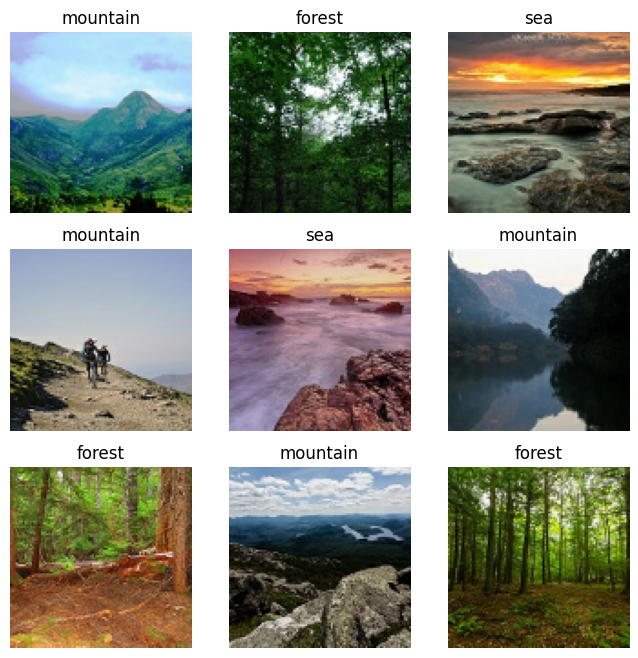

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
test_dataset = image_dataset_from_directory('nature/nature/seg_test/seg_test',
                                             batch_size=batch_size,
                                             image_size=image_size)

Found 1946 files belonging to 4 classes.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(100,
100, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 128)       0         
 g2D)                                                   

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=25,
                    verbose=2)

Epoch 1/25
15/15 - 69s - loss: 20.1052 - accuracy: 0.2429 - val_loss: 1.3853 - val_accuracy: 0.2393 - 69s/epoch - 5s/step
Epoch 2/25
15/15 - 9s - loss: 1.3818 - accuracy: 0.2584 - val_loss: 1.3581 - val_accuracy: 0.2654 - 9s/epoch - 626ms/step
Epoch 3/25
15/15 - 9s - loss: 1.3114 - accuracy: 0.3439 - val_loss: 1.2794 - val_accuracy: 0.4787 - 9s/epoch - 623ms/step
Epoch 4/25
15/15 - 10s - loss: 1.2213 - accuracy: 0.4779 - val_loss: 1.0673 - val_accuracy: 0.5498 - 10s/epoch - 667ms/step
Epoch 5/25
15/15 - 9s - loss: 1.0955 - accuracy: 0.5247 - val_loss: 0.9581 - val_accuracy: 0.5806 - 9s/epoch - 628ms/step
Epoch 6/25
15/15 - 10s - loss: 1.0932 - accuracy: 0.5053 - val_loss: 0.9483 - val_accuracy: 0.5853 - 10s/epoch - 641ms/step
Epoch 7/25
15/15 - 10s - loss: 0.9818 - accuracy: 0.5868 - val_loss: 0.8810 - val_accuracy: 0.6019 - 10s/epoch - 643ms/step
Epoch 8/25
15/15 - 10s - loss: 0.8269 - accuracy: 0.6487 - val_loss: 0.9445 - val_accuracy: 0.6090 - 10s/epoch - 692ms/step
Epoch 9/25
15/15

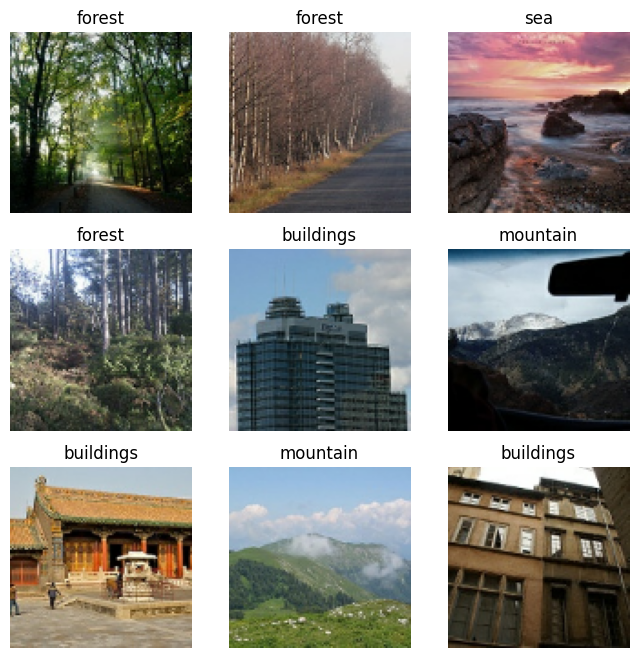

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
scores = model.evaluate(test_dataset, verbose=1)

8/8 [==============================] - 8s 996ms/step - loss: 0.5240 - accuracy: 0.8088


In [ ]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 80.8839


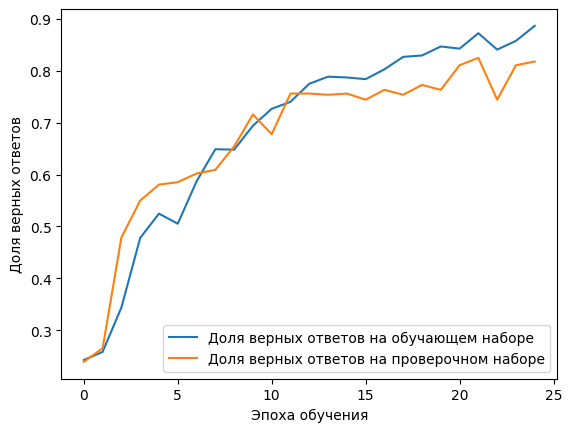

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

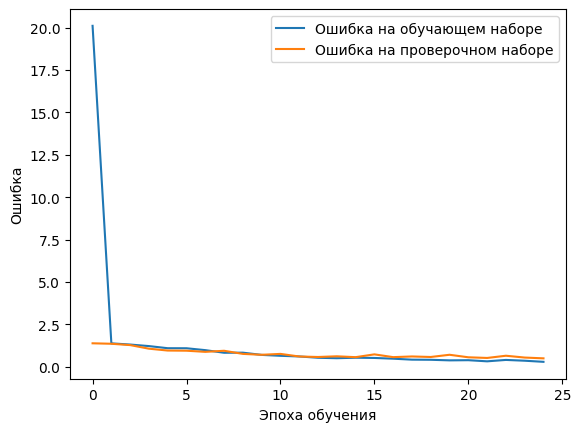

In [ ]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show()